In [57]:
# Data Wrangling for CapStone Project-1
# Importing the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
# read the csv into the data frame
math_df = pd.read_csv('student-mat.csv')
port_df = pd.read_csv('student-por.csv')

In [59]:
# display the head of dataframe containing the math scores of the students
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [60]:
# display the head of dataframe containing the portugese scores of the students
port_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [61]:
# Let's try to find out if there are any common students in the dat set.
common_df = pd.merge(math_df,port_df, on = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
print("The common students across all dat sets are - " ,len(common_df))

The common students across all dat sets are -  382


In [62]:
# Now let's do a comparison on the maths and portugese grades of these 382 students and see if there is a correlation 
#among them.
cff = np.corrcoef(common_df.G3_x,common_df.G3_y)
print('The correlation among the maths and potugese final scores for the 382 common students is - ', cff[0][1])

The correlation among the maths and potugese final scores for the 382 common students is -  0.480349361941


As we can see there is a good co relation among the math and portugese scores. It is highly possible that a student performing good in the Mathematics will perform good in the Portugese as well.

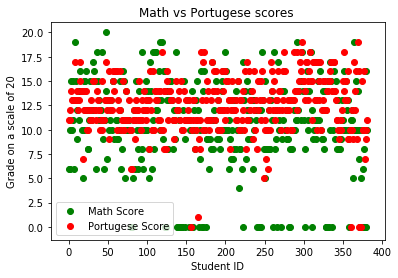

In [63]:
# Plotting a scatter plot to visulaize the relationship between the Maths and the Portugese scores.
i = np.arange(0,len(common_df))
plt.scatter(i,common_df.G3_x, c = 'g', label ='Math Score')
plt.scatter(i,common_df.G3_y,  c='r', label='Portugese Score')
plt.axis('tight')
plt.legend()
plt.title("Math vs Portugese scores ")
plt.xlabel("Student ID")
plt.ylabel("Grade on a scale of 20")
plt.show()

This plot is not very clear and doesnot convey the information clearly. It is hard to understand what type of relation is between the grades.

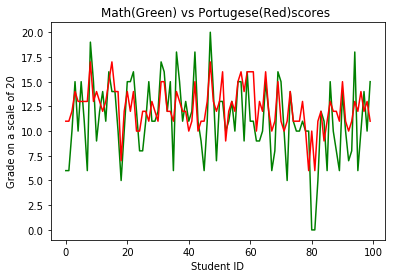

In [64]:
# plotting the line chart for just first 100 students. 
plt.plot(i[0:100],common_df.G3_x.iloc[0:100], c = 'g', label ='Math Score')
plt.plot(i[0:100],common_df.G3_y.iloc[0:100],  c='r', label='Portugese Score')
plt.title("Math(Green) vs Portugese(Red)scores ")
plt.xlabel("Student ID")
plt.ylabel("Grade on a scale of 20")
plt.show()

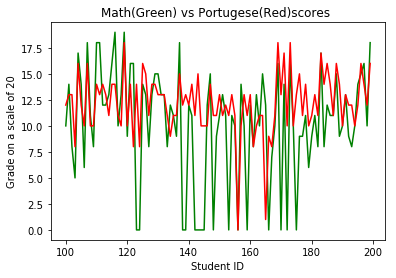

In [65]:
plt.plot(i[100:200],common_df.G3_x.iloc[100:200], c = 'g', label ='Math Score')
plt.plot(i[100:200],common_df.G3_y.iloc[100:200],  c='r', label='Portugese Score')
plt.title("Math(Green) vs Portugese(Red)scores ")
plt.xlabel("Student ID")
plt.ylabel("Grade on a scale of 20")
plt.show()

It can be easily observed from the above graphs that there is a strong relationship between the Maths and portugese scores. These line plots are easy to follow and understand.

In [66]:
# Checking for any null values in both the data frames-
print( 'Are there any null values - ', math_df.isnull().values.any())

Are there any null values -  False


In [67]:
print( 'Are there any null values - ',port_df.isnull().values.any())

Are there any null values -  False


In [68]:
# change the columns into categorical data-
# We have to look which all columns need to be tranformed. Looking on the data sets the columns which need
# need to be transformed are - 'Mjob', 'Fjob', 'reason' and 'gaurdian'. Why all others features are nottransformed 
# refer to the document with this notebook.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = math_df.Mjob
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


[0 0 0 1 2 3 2 2 3 2 4 3 1 4 2 1 3 2 3 1 4 1 4 2 3 3 2 1 3 4 1 3 4 2 2 2 4
 2 3 0 2 4 3 3 2 2 2 1 4 3 3 1 1 3 2 2 3 4 2 3 1 3 2 4 3 4 2 3 1 2 2 2 2 2
 2 4 4 2 2 0 2 2 3 3 2 3 0 2 3 4 2 3 2 4 3 0 3 2 2 2 3 3 3 3 3 2 2 3 2 1 4
 3 0 4 1 4 2 2 2 2 0 3 2 1 2 3 2 0 3 4 3 0 2 3 0 3 0 2 3 4 4 3 4 0 2 2 1 0
 4 3 2 0 3 3 2 0 2 0 0 2 0 2 2 0 2 3 2 1 2 1 2 2 4 0 2 4 3 2 4 2 4 3 3 2 2
 3 3 2 1 0 3 0 0 3 2 3 3 4 3 4 1 2 2 2 3 0 3 4 0 4 2 3 2 3 3 2 2 3 0 0 0 0
 3 2 4 2 2 3 0 2 1 2 4 1 2 0 2 2 0 2 1 4 4 3 2 2 2 3 2 2 3 0 3 2 2 1 4 3 2
 3 3 4 2 2 0 2 3 4 1 2 2 2 2 0 0 3 2 4 1 4 3 4 0 2 2 2 0 3 3 4 4 1 3 3 3 1
 1 2 2 4 1 2 2 1 2 3 3 4 2 0 3 0 2 3 0 2 3 2 0 4 3 2 3 3 0 2 2 3 4 4 2 0 3
 2 0 3 3 2 3 2 3 4 3 0 0 2 4 4 1 2 2 1 0 2 3 3 4 3 2 0 0 0 3 0 2 0 4 2 0 2
 3 0 2 2 2 2 1 4 2 0 4 2 2 2 2 0 4 3 4 2 3 3 2 3 2]
[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]]


We can see one hpt encoding in action using the sci-kit inbuilt functions. Same approach can be applied
to otehr columns like 'Fjob', 'reason' and 'gaurdian'

In [69]:
# check if there are outliers in grades-
print( 'Are there any outliers in the final grade column for Maths- ',(math_df.G3 > 20).values.any())

Are there any outliers in the final grade column for Maths-  False


In [70]:
print( 'Are there any outliers in the final grade column for Portugese- ',(port_df.G3 > 20).values.any())

Are there any outliers in the final grade column for Portugese-  False
